In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('/content/heart.csv')


In [5]:
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [6]:
df.shape

(918, 12)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
777,55,M,ATA,130,262,0,Normal,155,N,0.0,Up,0
423,60,M,NAP,180,0,0,ST,140,Y,1.5,Flat,0
833,54,M,NAP,120,258,0,LVH,147,N,0.4,Flat,0
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
480,58,M,ATA,126,0,1,Normal,110,Y,2.0,Flat,1
445,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1
419,55,M,ASY,142,228,0,ST,149,Y,2.5,Up,1
762,40,M,ASY,110,167,0,LVH,114,Y,2.0,Flat,1
588,67,M,ASY,140,219,0,ST,122,Y,2.0,Flat,1


In [11]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [12]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [13]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [14]:
df['FastingBS'].unique()

array([0, 1])

In [15]:
df['MaxHR'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

In [16]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [17]:
df['Oldpeak']=df['Oldpeak'].astype(int)

In [18]:
df['Oldpeak'].sample(5)

346    0
456    0
844    0
28     0
85     1
Name: Oldpeak, dtype: int64

In [19]:
df['HeartDisease'].unique()

array([0, 1])

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0,Up,0


In [21]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.720044,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.990165,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.000000,1.000000


<Axes: >

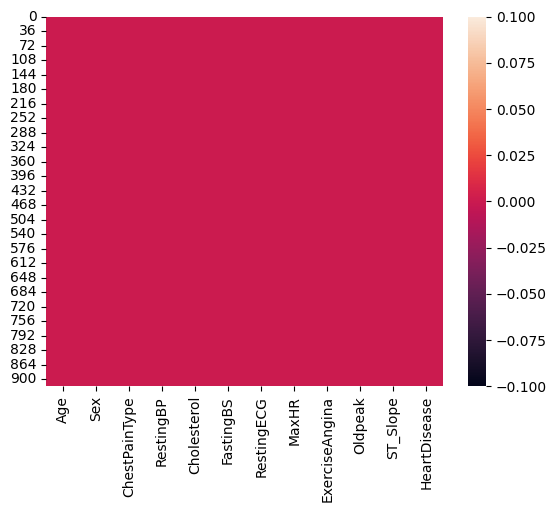

In [23]:
sns.heatmap(df.isnull())

In [24]:
obj_var=[]
num_var=[]
for i in df.columns:
    if df[i].dtype=="object":
        obj_var.append(i)
    else:
        num_var.append(i)

In [25]:
obj_var

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [26]:
num_var

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<Axes: >

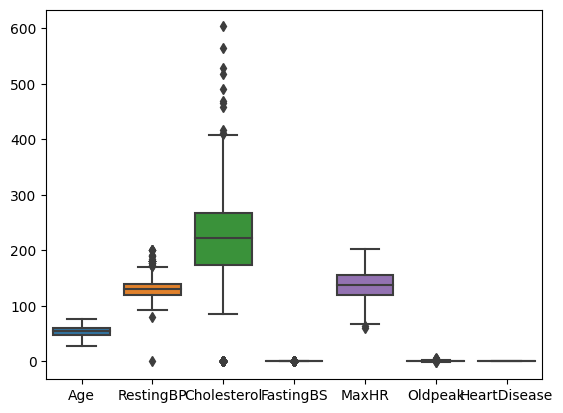

In [27]:
sns.boxplot(df[num_var])

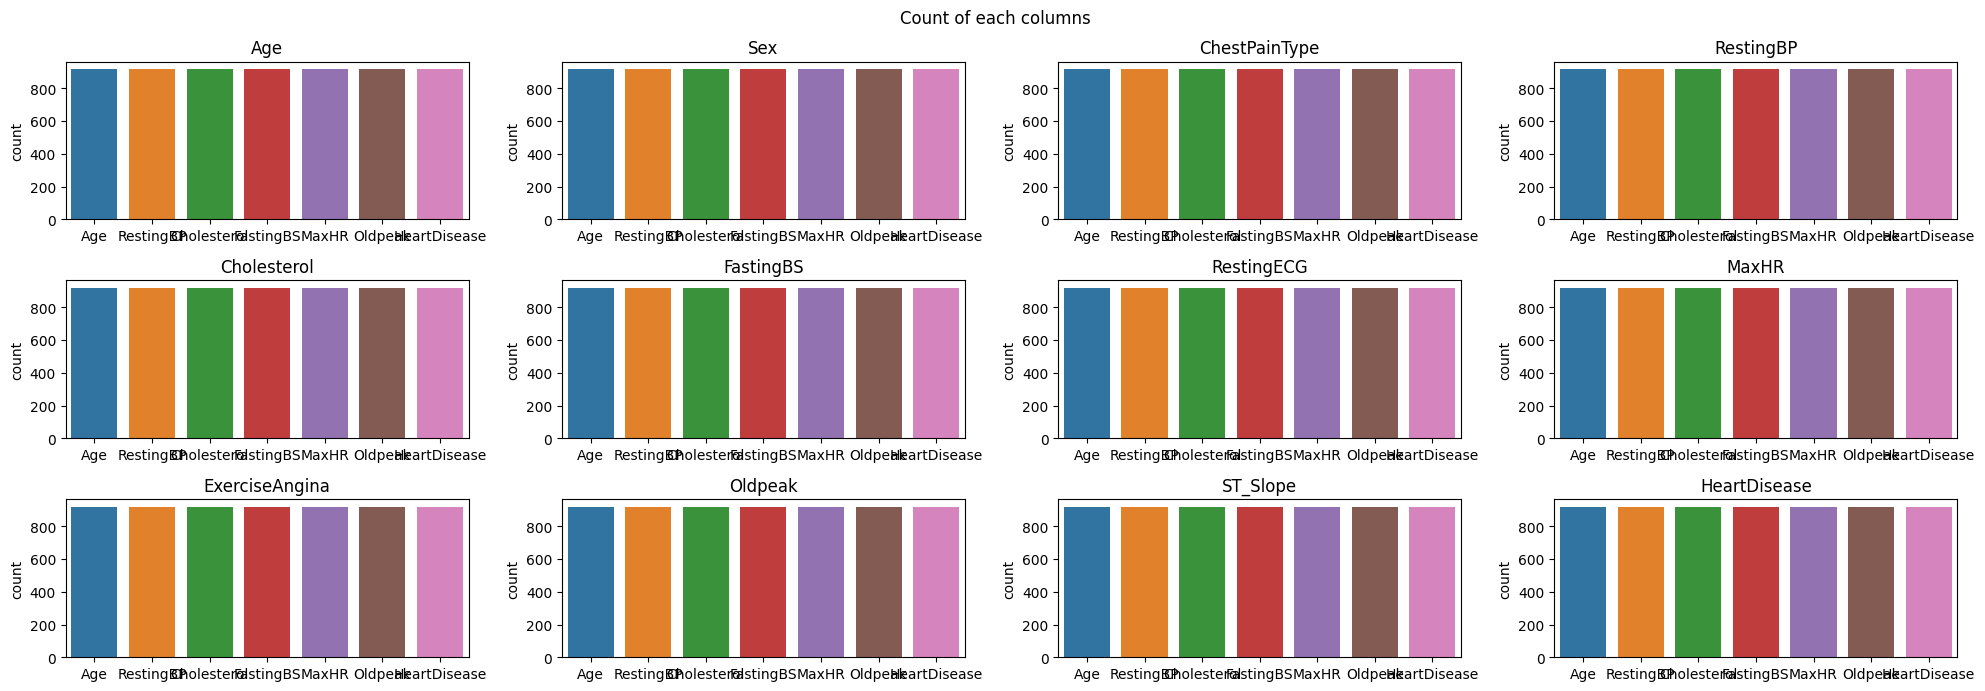

In [28]:
plt.figure(figsize=(20,9))

for i,v in enumerate(df):
    plt.subplot(4,4,i+1)
    sns.countplot(df)
    plt.title(v)

plt.suptitle("Count of each columns")
plt.tight_layout()
plt.show()

In [29]:
X=df.drop(columns='HeartDisease')
y=df['HeartDisease']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [33]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240,1,Normal,194,N,0,Down
25,36,M,NAP,130,209,0,Normal,178,N,0,Up
84,56,M,ASY,150,213,1,Normal,125,Y,1,Flat
10,37,F,NAP,130,211,0,Normal,142,N,0,Up
344,51,M,ASY,120,0,1,Normal,104,N,0,Flat


In [35]:
onh=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
stc=StandardScaler()

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 795 to 102
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             734 non-null    int64 
 1   Sex             734 non-null    object
 2   ChestPainType   734 non-null    object
 3   RestingBP       734 non-null    int64 
 4   Cholesterol     734 non-null    int64 
 5   FastingBS       734 non-null    int64 
 6   RestingECG      734 non-null    object
 7   MaxHR           734 non-null    int64 
 8   ExerciseAngina  734 non-null    object
 9   Oldpeak         734 non-null    int64 
 10  ST_Slope        734 non-null    object
dtypes: int64(6), object(5)
memory usage: 68.8+ KB


In [38]:
tf1=ColumnTransformer(transformers=[
    ('onh',onh,[1,2,6,8,10])
],remainder='passthrough')

In [39]:
pd.get_dummies(df)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [40]:
tf2=ColumnTransformer(transformers=[
    ('stc',stc,slice(0,None))
],remainder='passthrough')

In [41]:
pipe_lgs=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('logistic Classifer',LogisticRegression())
])

In [42]:
pipe_lgs.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 6, 8, 10])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('logistic Classifer', LogisticRegression())])

In [43]:
y_pred_lgr=pipe_lgs.predict(X_test)

In [44]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [45]:
## Evaluation metrics of algorithms
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix

In [46]:
accuracy_score(y_test,y_pred_lgr)*100

85.32608695652173

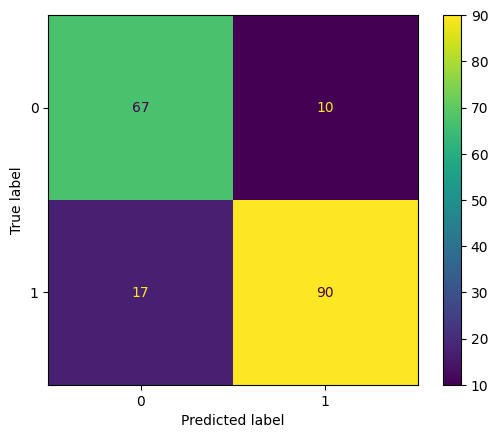

In [47]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

In [48]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
])

In [49]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 6, 8, 10])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [50]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred_dtc)*100

79.8913043478261

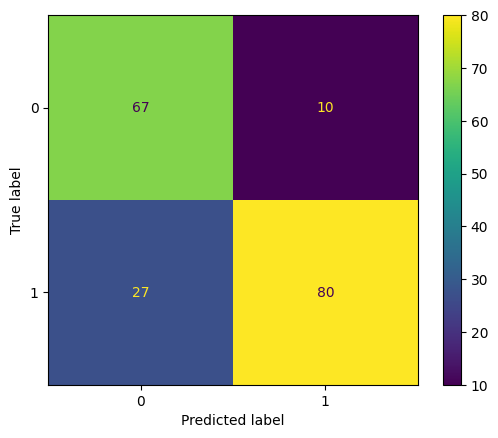

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

In [53]:
pipe_ssv=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('SVC',SVC())
])

In [54]:
pipe_ssv.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 6, 8, 10])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('SVC', SVC())])

In [55]:
y_pred_ssv=pipe_ssv.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred_ssv)*100

89.13043478260869

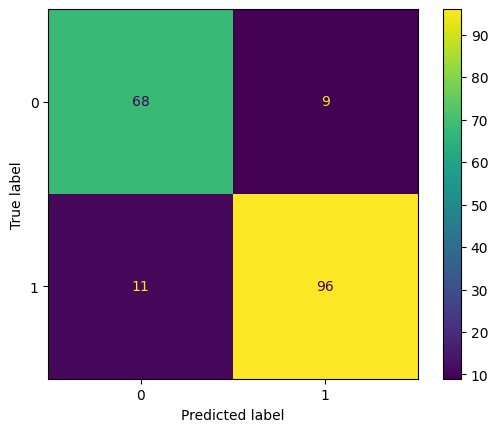

In [57]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ssv)).plot()

In [58]:
pipe_knc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('KNeighborsClassifier',KNeighborsClassifier())
])

In [59]:
pipe_knc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 6, 8, 10])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [60]:
y_pred_knc=pipe_knc.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred_knc)*100

85.86956521739131

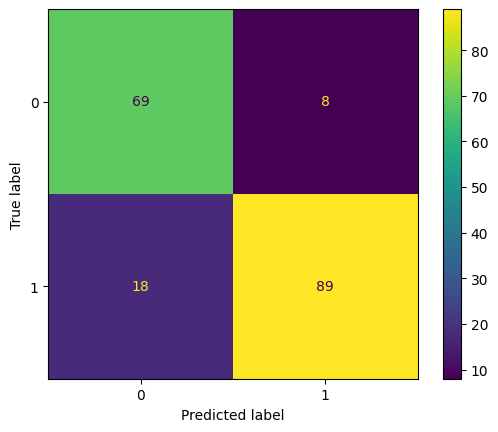

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knc)).plot()

In [63]:
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('RandomForestClassifier',RandomForestClassifier())
])

In [64]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 6, 8, 10])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('RandomForestClassifier', RandomForestClassifier())])

In [65]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred_rfc)*100

88.04347826086956

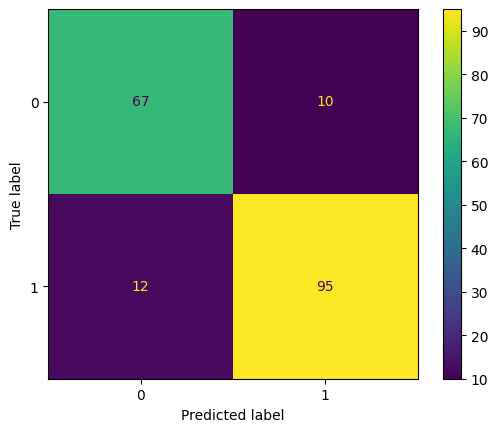

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()